<h2 style="color: white; background-color: #2A3F07; margin: 20px 0; padding: 30px 15px; border-radius: 4px;">
    🥑 Avocado Price Optimisation 💰
</h2>

<img src="images/avocado-banner.jpg" alt="Avocado Banner" style="display: block; width: 100%; max-height: 200px; object-fit: cover; border-radius: 4px; margin: 20px 0;">


<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">Table of Contents</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

1. [Background Context](#background-context)
2. [Notebook Setup](#notebook-setup)
3. [Data Collection and Description](#data-collection-description)
4. [Data Loading](#data-loading)
5. [Data Cleaning and Filtering](#data-cleaning-filtering)
6. [Exploratory Data Analysis](#exploratory-data-analysis)
7. [Modeling Avocado Sales](#modeling)
8. [Optimising Avocado Prices](#optimisation)
9. [Conclusion](#conclusion)
10. [References](#references)

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="background-context" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">1. Background Context</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

Setting product prices requires a careful balance between profitability and consumer demand. While higher price points can lead to greater profit margins per unit sold, consumers may be less willing to pay a premium, especially in cases where competition and the rising cost of living play significant roles in purchasing decisions. 

Avocados, known for their versatility in the kitchen, have earned a reputation as a luxury item in certain regions due to their relatively high price compared to other fruits and their association with modern, health-conscious lifestyles. Due to their high demand, consumers often anticipate paying more for avocados compared to other fruits. However, key questions remain: how much are consumers willing to pay, and what impact does pricing have on consumer purchasing decisions? Answering these questions is crucial for avocado retailers aiming to maximise profits while maintaining strong consumer demand. In recent years, machine learning has emerged as a valuable tool for predicting consumer demand based on pricing and other key factors. 

**The aim of this project is to** (i) forecast avocado demand, considering factors such as pricing, variety, region, and seasonality, and (ii) optimise pricing strategies to align with demand, ensuring profitability and sustained consumer interest. To do this, a combination of machine learning and optimisation algorithms will be used.

**We hypothesise that** avocado demand is influenced by a combination of factors, including price, variety and seasonality, and that machine learning models can accurately predict consumer demand based on these variables. Additionally, we expect that optimised pricing strategies, tailored to specific regions and seasons, will result in increased profitablity without significantly reducing demand.

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="notebook-setup" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">2. Notebook Setup</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

Import packages

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    KFold,
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor,
)
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

import mlflow
from matplotlib.colors import LinearSegmentedColormap

Turn off warning notifications

In [51]:
import warnings
warnings.filterwarnings("ignore")

Choose notebook color palettes

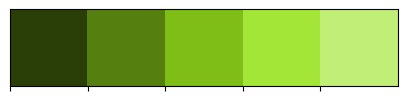

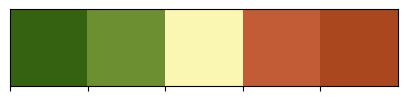

In [52]:
greens = ["#2A3F07", "#557F0F", "#7FBE17", "#A4E637", "#C1EE76"]
mixed = ["#356211", "#6C8F32", "#F9F7B2", "#C15C37", "#AA471F"]

# Create custom color map
mixed_cmap = LinearSegmentedColormap.from_list("mixed_cmap", mixed)
greens_cmap = LinearSegmentedColormap.from_list("greens_cmap", greens)

sns.palplot(greens)
sns.palplot(mixed)

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="data-collection-description" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">3. Data Collection and Description</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

Weekly US avocado sales and pricing data, collected by the Hass Avocado Board between 2015 and 2023, was used for this project. The data was obtained from Kaggle at this [link](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/data) and is stored in the `Data/Avocado_HassAvocadoBoard_20152023.csv` file. 

The data consists of 12 features and 53.4k observations.
The features are as follows:

* `Date` (datetime): The date of data recording.
* `AveragePrice` (float): The average avocado selling price in Dollars.
* `TotalVolume` (float): The total volume of avocados sold.
* `plu4046` (float): The volume of small/medium hass avocados (~3-5oz) sold in the week.
* `plu4225` (float): The volume of small/medium hass avocados (~8-10oz) sold in the week.
* `plu4770` (float): The volume of extra large hass avocados (~10-15oz) sold in the week.
* `TotalBags` (float): The volume of bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `SmallBags` (float): The volume of small bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `LargeBags` (float): The volume of of large bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `XLargeBags` (float): The volume of of extra large bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `type` (str): The type of avocado (conventional/organic).
* `region` (str): Regions and sub-regions in the US in which the avocados were sold. Total US sales are also included.

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="data-loading" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">4. Data Loading</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

Load the data from the `Data/Avocado_HassAvocadoBoard_20152023.csv` file into a pandas DataFrame for analysis.

In [53]:
avo_data = pd.read_csv(r"Data/Avocado_HassAvocadoBoard_20152023.csv", sep=",")
avo_data.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="data-cleaning-filtering" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">5. Data Cleaning and Filtering</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

To simplify the analysis, we will be focusing on individual unit sales only. Remove data on sales of avocado bags.

In [54]:
avo_data = avo_data.drop(
    columns=["TotalVolume", "TotalBags", "SmallBags", "LargeBags", "XLargeBags"]
)

Remove sub-regional and total US sales data. Keep US regional data only.

In [55]:
regions = [
    "California",
    "West",
    "Plains",
    "SouthCentral",
    "Southeast",
    "Midsouth",
    "GreatLakes",
    "Northeast",
]
avo_data = avo_data[avo_data.region.isin(regions)]

To assist with spotting errors in the data, print summary statistics for the numerical columns.

In [56]:
avo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,7456.0,1.392206,3.453067e-01,0.619393,1.113242,1.371662,1.649764e+00,2.58
plu4046,7456.0,812777.358403,1.065613e+06,0.000000,12693.922500,125653.515000,1.461486e+06,5160896.68
plu4225,7456.0,590396.359836,8.168833e+05,0.000000,22075.355000,149058.420000,8.772301e+05,5934192.22
plu4770,7456.0,54326.384307,1.168295e+05,0.000000,28.590000,2366.105000,4.084384e+04,1419739.17


Determine if there are any missing values.

In [57]:
avo_data.isnull().sum(axis=0)

Date            0
AveragePrice    0
plu4046         0
plu4225         0
plu4770         0
type            0
region          0
dtype: int64

Verify that the column data types are correct.

In [58]:
avo_data.dtypes

Date             object
AveragePrice    float64
plu4046         float64
plu4225         float64
plu4770         float64
type             object
region           object
dtype: object

Rename the columns in a snake_case format to facilitate ease of analysis.

In [59]:
avo_data = avo_data.rename(
    columns={"Date": "date", "AveragePrice": "average_unit_price"}
)

Extract year and month data into separate columns. Ensure that the date column is in date-time format. 

In [60]:
avo_data["year"] = pd.DatetimeIndex(avo_data["date"]).year
avo_data["month"] = pd.DatetimeIndex(avo_data["date"]).month
avo_data["date"] = pd.to_datetime(avo_data["date"])

Combine sales data into a single column.

In [61]:
avo_data = avo_data.melt(
    id_vars=["average_unit_price", "type", "region", "year", "month", "date"],
    value_vars=["plu4046", "plu4225", "plu4770"],
    var_name="plu",
    value_name="volume_sold",
)

The dataset contains weekly avocado sales data. Ensure that the data is grouped accordingly.

In [62]:
avo_data = (
    avo_data.set_index("date")
    .groupby([pd.Grouper(freq="W"), "year", "month", "type", "region", "plu"])
    .agg({"average_unit_price": "mean", "volume_sold": "sum"})
    .reset_index()
)

Change the units of the volume_sold column to millions.

In [63]:
avo_data["volume_sold"] = avo_data["volume_sold"] / 1000000

View cleaned data.

In [64]:
avo_data.head(5)

,date,year,month,type,region,plu,average_unit_price,volume_sold
0,2015-01-04,2015,1,conventional,California,plu4046,0.93,2.843648
1,2015-01-04,2015,1,conventional,California,plu4225,0.93,2.267755
2,2015-01-04,2015,1,conventional,California,plu4770,0.93,0.137480
3,2015-01-04,2015,1,conventional,GreatLakes,plu4046,1.02,0.467259
4,2015-01-04,2015,1,conventional,GreatLakes,plu4225,1.02,2.059658


Save the cleaned data to a CSV file.

In [65]:
avo_data.to_csv("Data/Avocado_HassAvocadoBoard_cleaned_20152023.csv")

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="exploratory-data-analysis" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">6. Exploratory Data Analysis</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

Throughout the EDA process, multiple subplots will be constructed. Create a flexible function to create subplots for several use-cases.

In [66]:
def create_subplots(
    nrows: int,
    ncols: int,
    plot_types: list,
    data_list: list,
    figsize: tuple = (10, 5),
    fig_title: str = None,
    x_vars: list = None,
    y_vars: list = None,
    hues: list = None,
    palettes: list = None,
    titles: list = None,
    xlabels: list = None,
    ylabels: list = None,
    xrotation: list = None,
    yrotation: list = None,
    ylog=False,
    bar_labels=False,
    twin_lineplots=False,
    secondary_data: list = None,
    secondary_y: list = None,
    secondary_ylabels: list = None,
    secondary_colors: list = None,
    secondary_labels: list = None,
):
    """
    Function to create subplots for various plot types and configurations.
    Arguments:
    - nrows, ncols: Grid of subplots
    - figsize: Size of the figure
    - fig_title: Figure title
    - plot_types: List of plot types ('countplot', 'barplot', etc.)
    - data_list: List of datasets for each subplot
    - x_vars: List of x-axis variables for each subplot
    - y_vars: List of y-axis variables for barplot or y-values (if applicable).
    - hues: List of hue variables (if applicable)
    - palettes: List of color palettes
    - titles: Titles for each subplot
    - xlabels: X-axis labels for each subplot
    - ylabels: Y-axis labels for each subplot
    - xrotation: Rotation for x-axis labels
    - yrotation: Rotation for x-axis labels
    - ylog: Log-scale for y-axis
    - bar_labels: If true, adds labels to each bar (used with barplots)
    - twin_lineplots: If True, creates twin y-axis lineplots for each subplot
    - secondary_data: Data for secondary plot
    - secondary_y: Y-axis variable for secondary plot
    - secondary_ylabels: Y-axis labels for secondary plot
    - secondary_colors: Colors for secondary plot
    - secondary_labels: Labels for the secondary plot (legend)
    """

    # Define the number and size of subplots
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle(fig_title)

    # Flatten axs array if there are multiple subplots, so we can iterate easily
    if nrows * ncols > 1:
        axs = axs.flatten()
    else:
        axs = [axs]

    for i, ax in enumerate(axs):

        # Iterate through each subplot and configure the plot based on plot_type
        plot_type = plot_types[i]

        if plot_type == "countplot":
            sns.countplot(
                data=data_list[i], x=x_vars[i], hue=hues[i], palette=palettes[i], ax=ax
            )

        elif plot_type == "barplot":
            sns.barplot(
                data=data_list[i],
                x=x_vars[i],
                y=y_vars[i],
                hue=hues[i],
                palette=palettes[i],
                ax=ax,
            )
            if bar_labels == True:
                for container in ax.containers:
                    ax.bar_label(container, fmt="%.2e")

        elif plot_type == "boxplot":
            sns.boxplot(
                data=data_list[i],
                x=x_vars[i],
                y=y_vars[i],
                hue=hues[i],
                palette=palettes[i],
                ax=ax,
            )

        elif plot_type == "lineplot":
            sns.lineplot(
                data=data_list[i],
                x=x_vars[i],
                y=y_vars[i],
                color=palettes[i],
                marker="o",
                ax=ax,
            )

    
        # If twin_lineplots is True, create a secondary y-axis
        if twin_lineplots:
            ax2 = ax.twinx()
        else:
            ax2 = ax

        # If secondary data is provided, 
        # plot it on the same or secondary y-axis, as specified
        if secondary_data:
            sns.lineplot(
                data=secondary_data[i],
                x=x_vars[i],
                y=secondary_y[i],
                ax=ax2,
                color=secondary_colors[i],
                label=secondary_labels[i],
                marker="o",
            )

            ax2.set_ylabel(secondary_ylabels[i])

        # Configure plot title and axis settings
        ax.set_title(titles[i])

        if xrotation:
            ax.tick_params(axis="x", rotation=xrotation)

        if yrotation:
            ax.tick_params(axis="y", rotation=yrotation)

        if ylog:
            ax.set_yscale("log")

        if xlabels:
            ax.set_xlabel(xlabels[i])
        else:
            ax.set_xlabel("")

        if ylabels:
            ax.set_ylabel(ylabels[i])
        else:
            ax.set_ylabel("")

    # Adjust subplot layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    plt.show()

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.1. Distribution of Categorical Variables</h2>

Examine the distribution of categorical variables. An imbalanced distribution may bias a regression model toward more frequent categories when predicting sales demand.

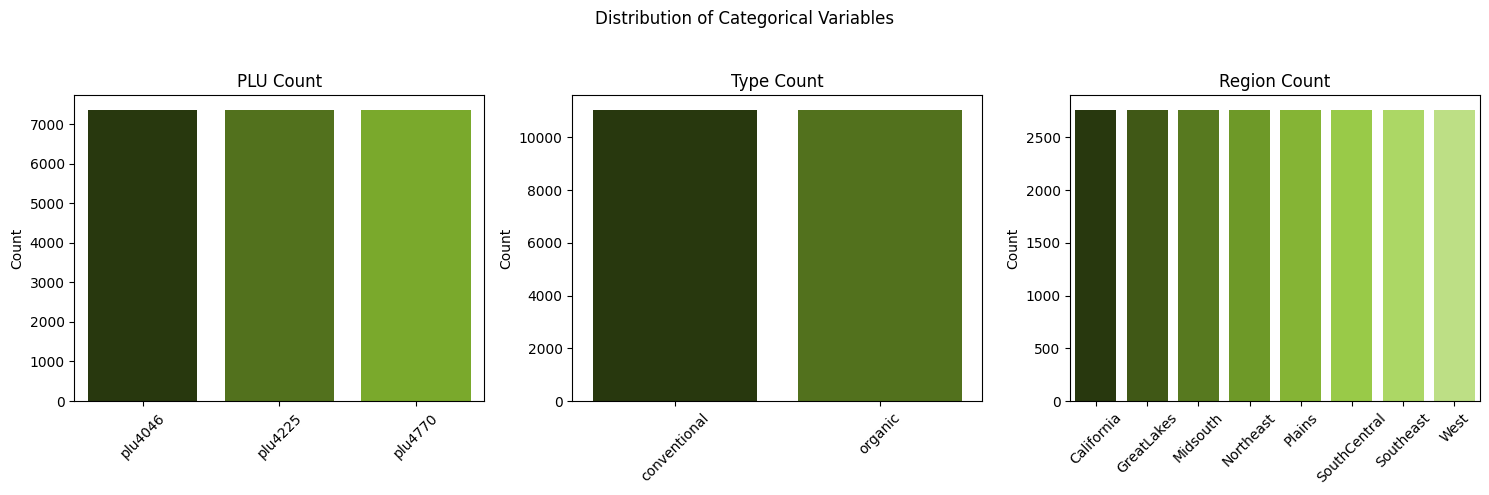

In [67]:
# Plot the distribution of PLU, Type and Region
create_subplots(
    nrows=1,
    ncols=3,
    plot_types=["countplot"]*3,
    data_list=[avo_data]*3,
    figsize=(15, 5),
    fig_title="Distribution of Categorical Variables",
    x_vars=["plu", "type", "region"],
    hues=["plu", "type", "region"],
    palettes=[greens, greens, list(greens_cmap(np.linspace(0, 1, 8)))],
    titles=["PLU Count", "Type Count", "Region Count"],
    xlabels=None,
    ylabels=["Count"]*3,
    xrotation=45,
)

The plots above show balanced distributions of the categorical variables:

* PLU Count: The three PLU codes (plu4046, plu4225, plu4770) are evenly distributed with 7456 observations each.
* Type Count: Conventional and organic types are evenly distributed with 11184 counts each.
* Region Count: All regions have 2796 counts, indicating a uniform distribution of data across regions.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.2. Distribution of Numerical Variables</h2>

Examine the distribution of numerical variables. If features have highly skewed distributions the regression models may not perform as well, especially in the case of linear regression which assumes that numerical features follow a normal distribution.

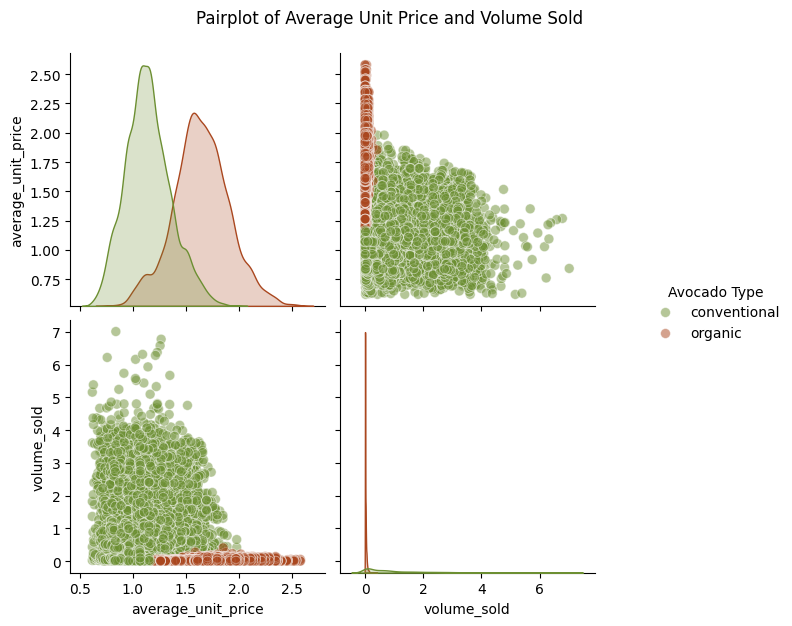

In [68]:
# Plot the distribution of average unit price and volume sold
pairplot = sns.pairplot(
    data=avo_data[["type", "average_unit_price", "volume_sold"]],
    plot_kws={"alpha": 0.5, "s": 50, "edgecolor": "w"},
    hue="type",
    palette=["#6C8F32", "#AA471F"],
)

# Set the chart title, axis labels and size
pairplot.fig.suptitle("Pairplot of Average Unit Price and Volume Sold", y=1.05)
pairplot._legend.set_title("Avocado Type")
pairplot.fig.set_size_inches(8, 6)

plt.show()

The pairplot visualises the distribution of average unit price and volume sold, and the relationship between the two variables, distinguishing between two avocado types: conventional (green) and organic (brown).

The following insights are apparent:
 
* The prices of organic avocados tend to have a normal distribution with higher average prices compared to convention avocados, mostly ranging between 1.50 and 2.50 Dollars.
* The prices of conventional avocados also follow a normal distribution, but are generally cheaper, with prices ranging between 0.75 and 1.50 Dollars.
* The sales of organic avocados are more consistent in comparison to conventional avocados, with less fluctuation due to price. This is indicative of a stable market, with a low price elasticity.
* Conventional avocado sales are skewed to the right. This may be due to the presence of outliers, which may need to be removed if linear regression models are constructed. Conventional avocados have a much higher number of volume sold compared to organic, with a large number of data points clustered on the lower end of the average unit price. 

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.3. The Effect of Avocado Variety on Sales and Pricing</h2>

To determine whether sales and pricing differ for different avocado varieties, compare sales and pricing for different PLU codes (plu4046, plu4225, plu4770) for both conventional and organic avocados. 

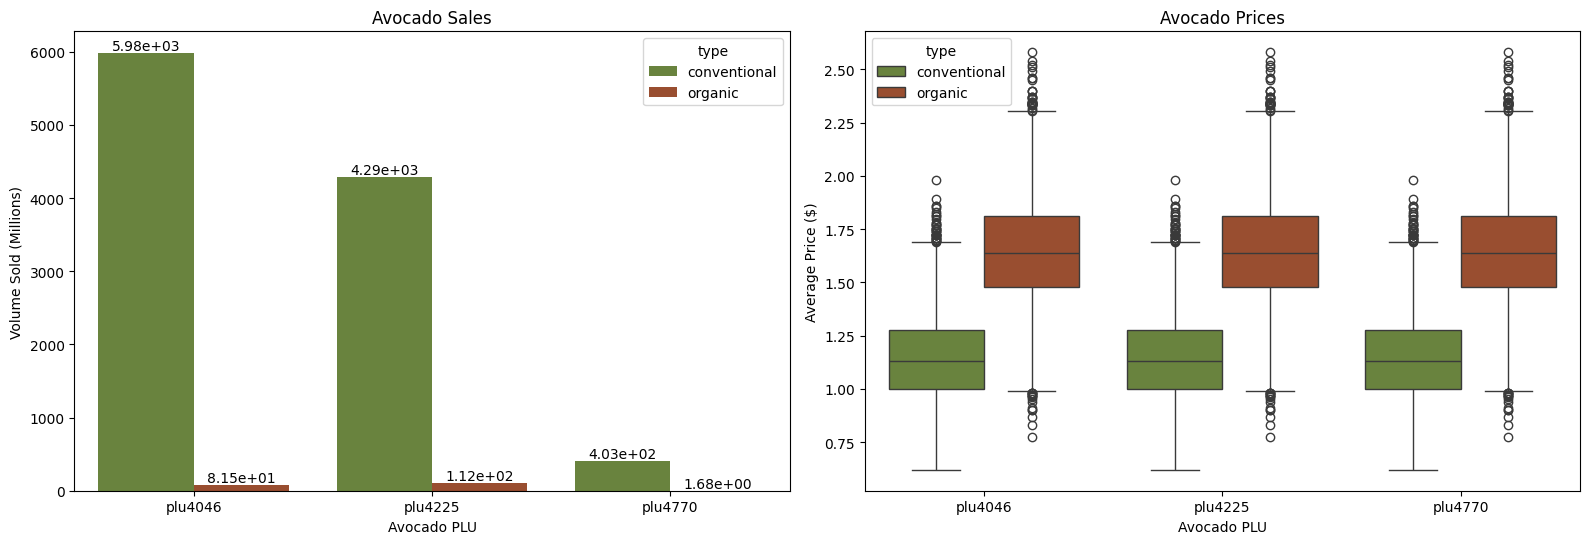

In [69]:
# Calculate sales by type and PLU
sales_data_by_variety = (
    avo_data.groupby(["plu", "type"])[["volume_sold"]].sum().reset_index()
)

# Plot the differences in volume sales and pricing for different avocado PLUs
create_subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 6),
    plot_types=["barplot", "boxplot"],
    data_list=[sales_data_by_variety, avo_data],
    x_vars=["plu"]*2,
    y_vars=["volume_sold", "average_unit_price"],
    hues=["type", "type"],
    palettes=[["#6C8F32", "#AA471F"], ["#6C8F32", "#AA471F"]],
    titles=["Avocado Sales", "Avocado Prices"],
    xlabels=["Avocado PLU"]*2,
    ylabels=["Volume Sold (Millions)", "Average Price ($)"],
    bar_labels=True
)

The insights are as follows. 

Sales:
* Conventional avocados dominate in terms of volume sold across all PLUs.
* The sales volume for plu4046 is the highest for both types, followed by plu4225 and plu4770.
* Organic avocados have significantly lower sales compared to conventional ones, particularly for plu4770.

Pricing:
* Organic avocados consistently have higher prices than conventional avocados for all PLUs. However, the pricing does not differ by PLU.
* The boxplots show a wider price range for organic avocados, with more variation.
* Conventional avocados show a narrower price range with lower median prices.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.4. Regional Differences in Avocado Sales and Pricing</h2>

To determine whether sales and pricing differ for different US regions, compare sales and pricing across the regions for conventional and organic avocados. 

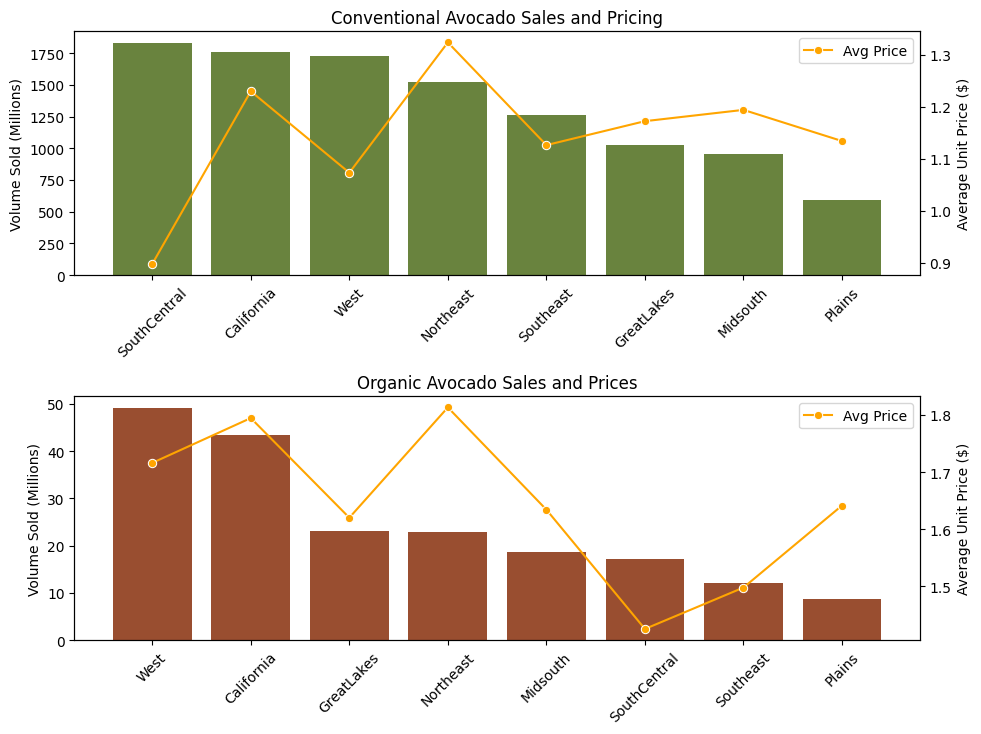

In [70]:
# Calculate sales and average prices for conventional avocados
regional_conv_avo_sales = (
    avo_data[avo_data.type == "conventional"][["region", "volume_sold"]]
    .groupby(["region"])
    .sum()
    .reset_index()
    .sort_values(by="volume_sold", ascending=False)
)
regional_conv_avo_prices = (
    avo_data[avo_data.type == "conventional"][["region", "average_unit_price"]]
    .groupby("region")
    .mean()
    .reset_index()
)

# Calculate sales and average prices for organic avocados
regional_org_avo_sales = (
    avo_data[avo_data.type == "organic"][["region", "volume_sold"]]
    .groupby(["region"])
    .sum()
    .reset_index()
    .sort_values(by="volume_sold", ascending=False)
)
regional_org_avo_prices = (
    avo_data[avo_data.type == "organic"][["region", "average_unit_price"]]
    .groupby("region")
    .mean()
    .reset_index()
)

# Plot total volume sold and average price for each region for conventional and organic avocados
create_subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 8),
    plot_types=["barplot"] * 2,
    data_list=[regional_conv_avo_sales, regional_org_avo_sales],
    x_vars=["region"] * 2,
    y_vars=["volume_sold"] * 2,
    hues=[None] * 2,
    palettes=[["#6C8F32"], ["#AA471F"]],
    titles=[
        "Conventional Avocado Sales and Pricing",
        "Organic Avocado Sales and Prices",
    ],
    ylabels=["Volume Sold (Millions)"] * 2,
    twin_lineplots=True,
    secondary_data=[regional_conv_avo_prices, regional_org_avo_prices],
    secondary_y=["average_unit_price"] * 2,
    secondary_colors=["orange"] * 2,
    secondary_labels=["Avg Price"] * 2,
    secondary_ylabels=["Average Unit Price ($)"] * 2,
    xrotation=45,
)

This figure above shows avocado sales (as bar charts) and average unit prices (as line plots) for conventional and organic avocado types across various regions. The insights are as follows:

**Conventional Avocados**
   - Sales
     - Highest volume sold are in regions like *South Central*, *California*, and *West*.
     - Lowest sales are in the *Plains* region.
   - Pricing
     - The average price fluctuates across regions, with the highest in *North East* and the lowest in the *South Central* region.
   - Relationship between Sales and Pricing
     - The relationship between pricing and sales is unclear at this point.

**Organic Avocados**
   - Sales
     - Highest volume sold are in *California* and the *West* regions.
     - Lowest volume sold are in the *Plains* and *Southeast* regions.
   - Pricing
     - The average price fluctuates across regions. The *West* region has the highest prices, while *South Central* has relatively lower prices compared to other regions.
   - Relationship between Sales and Pricing
     - The relationship between pricing and sales is unclear at this point.

**Summary**
- *Conventional Avocados* have a higher total sales volume compared to *Organic Avocados*, especially in high-population regions like *South Central* and *Northeast*.
- *Organic Avocados* tend to have higher prices, but the total sales are much lower than *Conventional Avocados*.
- The pricing patterns across regions are similar between *Conventional* and *Organic* avocados.

This data suggests that *Conventional Avocados* are more popular in terms of sales volume, but *Organic Avocados* have a niche market with higher pricing, especially in some regions like *West* and *California*.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.5. Annual Fluctuations in Avocado Sales and Pricing</h2>

To gain an idea of the annual fluctuations in avocado sales and pricing, plot average annual sales and pricing statistics from 2015 to 2023.

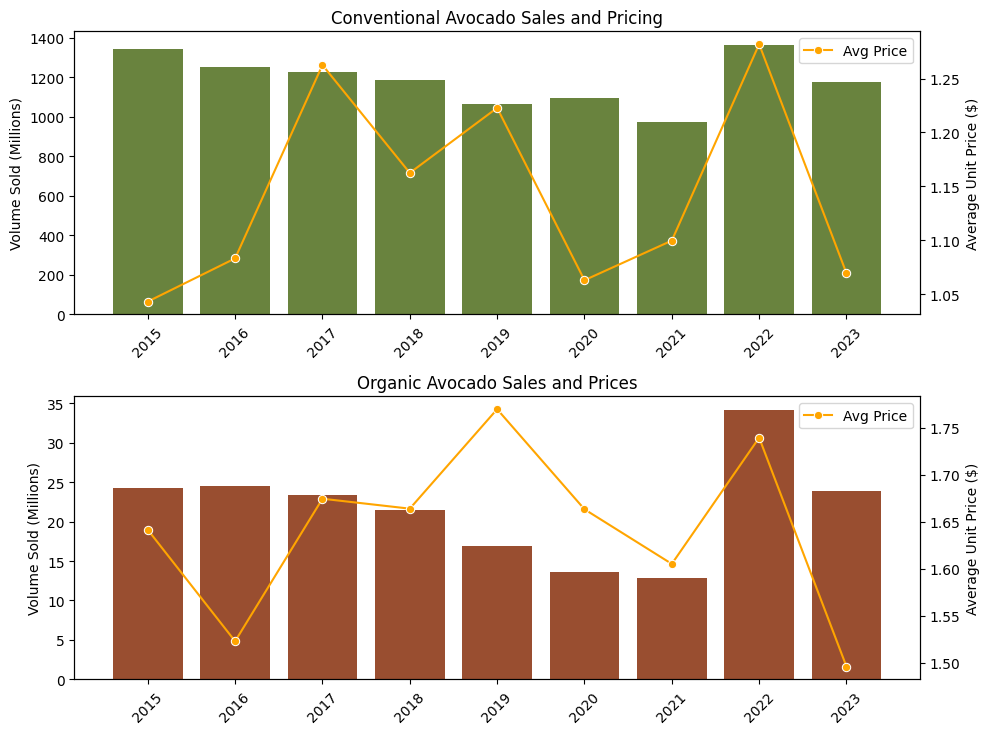

In [71]:
# Calculate yearly sales and average prices for conventional avocados
annual_conv_avo_sales = (
    avo_data[avo_data.type == "conventional"][["year", "volume_sold"]]
    .assign(year=avo_data["year"].astype(str))
    .groupby("year")
    .sum()
    .reset_index()
)

annual_conv_avo_prices = (
    avo_data[avo_data.type == "conventional"][["year", "average_unit_price"]]
    .assign(year=avo_data["year"].astype(str))
    .groupby("year")
    .mean()
    .reset_index()
)

# Calculate yearly sales and average prices for conventional avocados
annual_org_avo_sales = (
    avo_data[avo_data.type == "organic"][["year", "volume_sold"]]
    .assign(year=avo_data["year"].astype(str))
    .groupby("year")
    .sum()
    .reset_index()
)

annual_org_avo_prices = (
    avo_data[avo_data.type == "organic"][["year", "average_unit_price"]]
    .assign(year=avo_data["year"].astype(str))
    .groupby("year")
    .mean()
    .reset_index()
)

# Plot yearly total sales and average prices for conventional and organic avocados
create_subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 8),
    plot_types=["barplot"] * 2,
    data_list=[annual_conv_avo_sales, annual_org_avo_sales],
    x_vars=["year"] * 2,
    y_vars=["volume_sold"] * 2,
    hues=[None, None],
    palettes=[["#6C8F32"], ["#AA471F"]],
    titles=[
        "Conventional Avocado Sales and Pricing",
        "Organic Avocado Sales and Prices",
    ],
    ylabels=["Volume Sold (Millions)"] * 2,
    twin_lineplots=True,
    secondary_data=[annual_conv_avo_prices, annual_org_avo_prices],
    secondary_y=["average_unit_price"] * 2,
    secondary_colors=["orange"] * 2,
    secondary_labels=["Avg Price"] * 2,
    secondary_ylabels=["Average Unit Price ($)"] * 2,
    xrotation=45,
)

This figure above shows the annual fluctuations in avocado sales and pricing for conventional and organic avocados from 2015 to 2023. The insights are as follows:

**Conventional Avocados:**
   - Sales Volume:
     - Decreased steadily from 2015 to 2021, with a notable increase in 2022.
   - Price Trends:
     - Prices fluctuated from year to year, with the highest price recorded in 2017 and the lowest in 2023.
     - The drop in price from 2022 to 2023 is significant, despite a high sales volume in 2022.

**Organic Avocados:**
   - Sales Volume:
     - A similar pattern observed compared to conventional avocados.
     - Lowest sales occurred in 2021, with a significant recovery in 2022.
     - However, sales dropped again in 2023.
   - Price Trends:
     - Price peaks occurred in 2019 and 2022.
     - Similar to conventional avocados, there was a significant price drop in 2023.

**Summary**
  - Both conventional and organic avocados saw a price peak in 2017 and a notable price drop in 2023. 
  - Both avocado types experienced a rise in sales in 2022, but a sharp drop in price in 2023 for conventional avocados, suggesting potential market saturation or other factors affecting pricing.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.6. Seasonal Sales Trends</h2>

Based on the annual trends observed in the previous plots, some years exhibited higher average sales than others. A logical next step is to analyse whether specific months of the year show consistently higher average sales, i.e. whether there are seasonal sales trends.

Start by defining a function to plot the seasonal sales trends.

In [72]:
def plot_seasonal_decomposition(
    data, filters: list = None, fig_size=(16, 20), colors=["#6C8F32", "#AA471F"]
):
    """
    Plots the seasonal decomposition of monthly sales data.

    Parameters:
    - data (pd.DataFrame): DataFrame containing data with compulsary 'date', 'volume_sold' and 'type' columns
    - filters (list): Optional list of filters to subset data according to 'type' column
    - fig_size (tuple): Size of the figure in inches (default is (16, 20))
    """

    # Ensure 'date' is in datetime format
    data["date"] = pd.to_datetime(data["date"])

    # Create decomposition subplots
    fig, axs = plt.subplots(nrows=4, ncols=len(filters), figsize=fig_size)

    for i in range(len(filters)):

        filtered_data = (
            data[data.type == filters[i]][["date", "volume_sold"]]
            .groupby(pd.Grouper(key="date", freq="M"))
            .mean()
        )

        # Perform seasonal decomposition
        decomposition = sm.tsa.seasonal_decompose(filtered_data, model="multiplicative")

        # Plot observed, trend, seasonal, and residuals
        decomposition.observed.plot(
            ax=axs[0, i],
            title=f"{filters[i].capitalize()} Observed",
            ylabel="Average Volume Sold (Millions)",
            color=colors[i],
        )
        decomposition.trend.plot(
            ax=axs[1, i], title=f"{filters[i].capitalize()} Trend", color=colors[i]
        )
        decomposition.seasonal.plot(
            ax=axs[2, i], title=f"{filters[i].capitalize()} Seasonal", color=colors[i]
        )
        decomposition.resid.plot(
            ax=axs[3, i], title=f"{filters[i].capitalize()} Residuals", color=colors[i]
        )

    # Customize the overall plot
    fig.suptitle(f"Seasonal Decomposition of Monthly Sales", y=0.91)
    plt.subplots_adjust(hspace=0.4)

    for ax in fig.axes:
        ax.grid(True, linestyle="--", alpha=0.7)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_xlabel(None)

    # Show the plot
    plt.show()

Utilise the function to visualise sales trends over time.

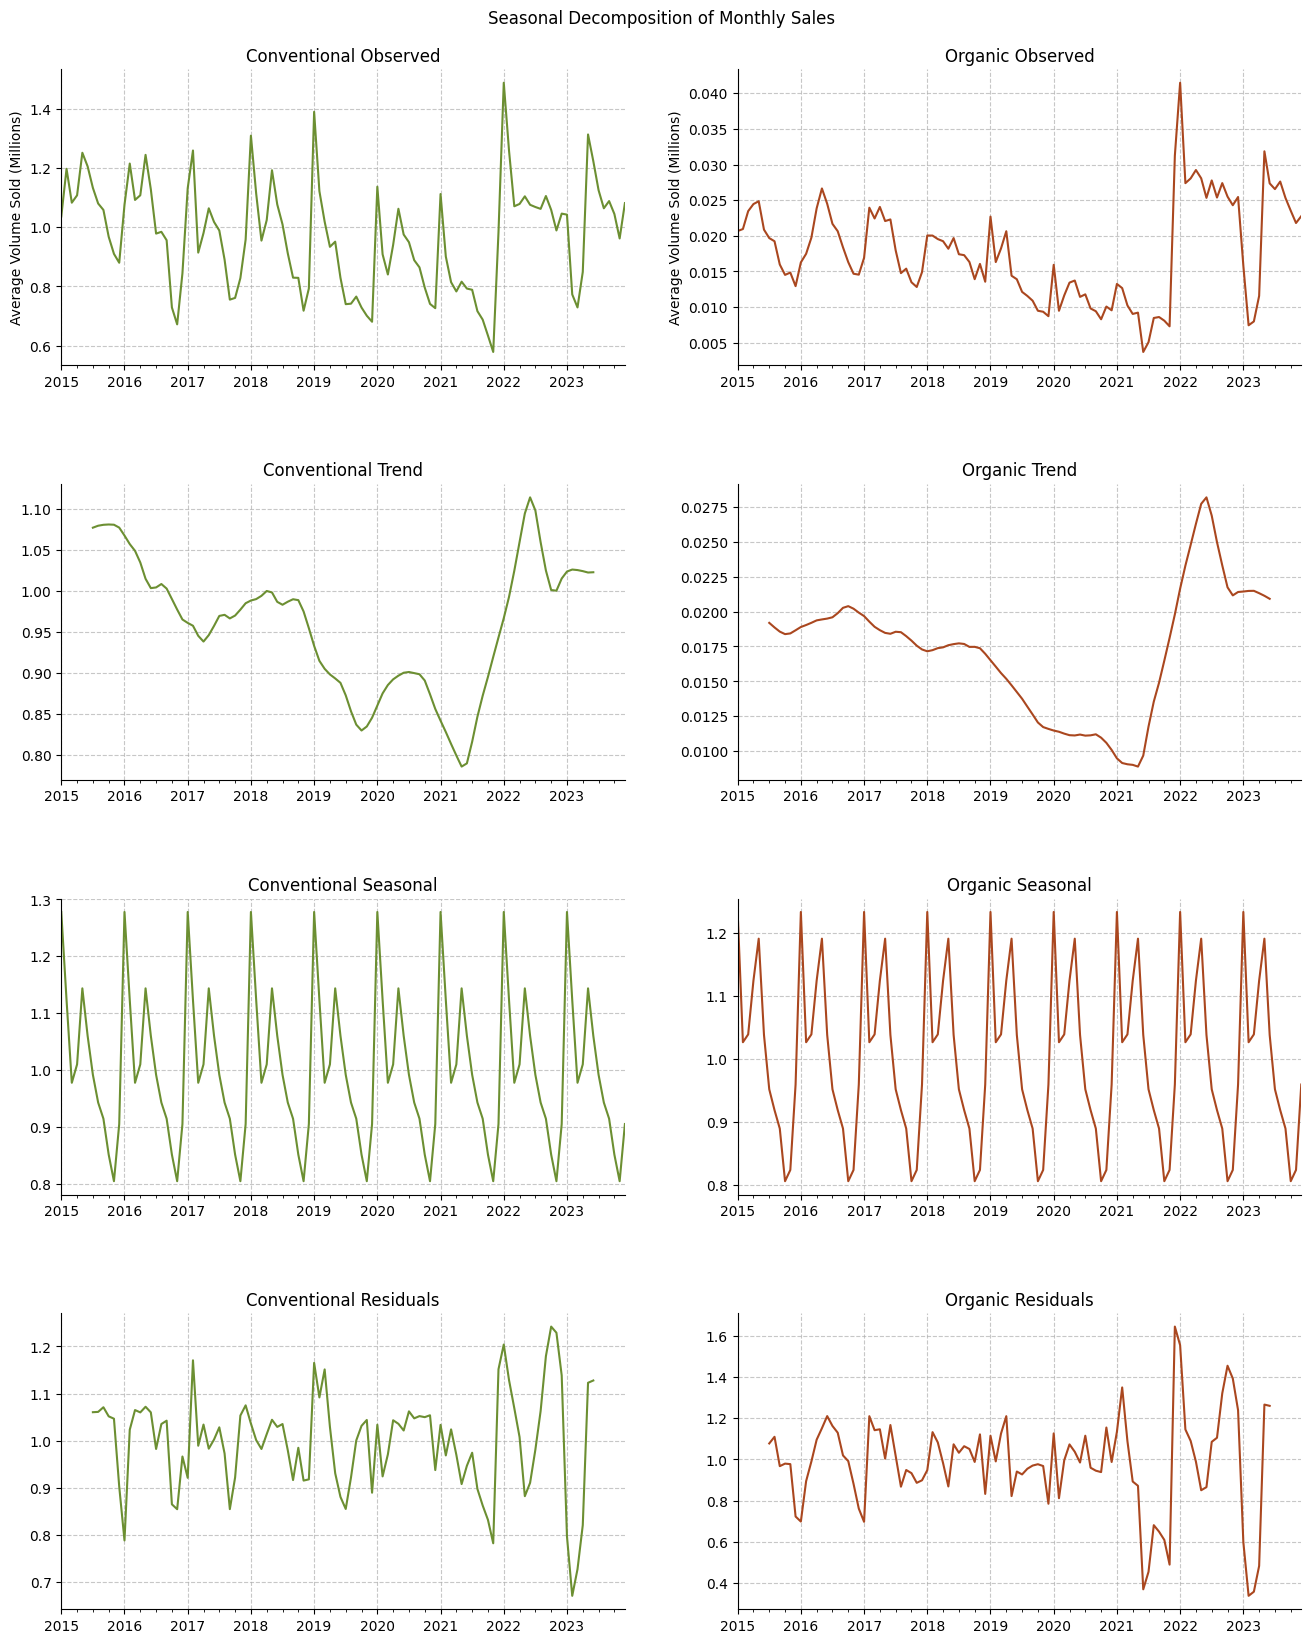

In [73]:
plot_seasonal_decomposition(avo_data.reset_index(), ["conventional", "organic"])

This figure above illustrates a seasonal decomposition of monthly sales for conventional and organic avocados from 2015 to 2023. The insights are as follows:

**Conventional Avocados:**
- Observed Sales: Show consistent seasonal fluctuations with high sales around mid-year.
- Trend: Overall decreasing trend until 2022 followed by a sharp rise in 2022.
- Seasonality: Clear annual peaks and troughs reflecting strong seasonal patterns.
- Residuals: Larger fluctuations in residuals over time, indicating less predictability or more external influences impacting sales over time.

**Organic Avocados:**
- Observed Sales: Less consistent seasonal fluctuations compared to conventional avocados.
- Trend: Overall decreasing trend until 2022 followed by a sharp rise in 2022.
- Seasonality: Strong and consistent seasonal spikes evident yearly.
- Residuals: As seen with conventional avocados: Larger fluctuations in residuals over time, indicating less predictability or more external influences impacting sales over time.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">6.7. Factors Exhibiting a Linear Relationship with Sales</h2>

To identify factors that have a linear relationship with sales, plot the correlation between units sold and region, price, PLU and type. Since region, PLU and type are categorical variables, first use one-hot encoding to create separate binary columns for each category. 

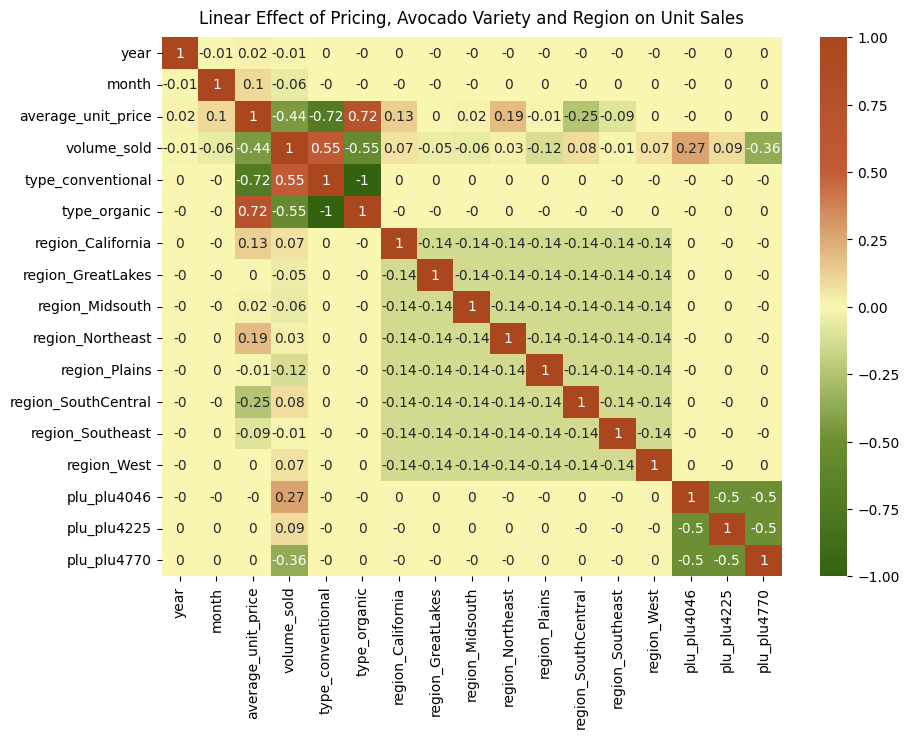

In [74]:
# Use one-hot encoding to convert categorical variables into binary values
corr_data = pd.get_dummies(
    avo_data.drop(columns=["date"]),
    columns=["type", "region", "plu"],
    drop_first=False,
)

# Calculate the correlation scores between features
correlation_values = round(corr_data.corr(), 2)

# Plot the correlation values as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_values, annot=True, cmap=mixed_cmap)
plt.title("Linear Effect of Pricing, Avocado Variety and Region on Unit Sales", pad=10)
plt.show()

The heatmap presents the correlation between various features, with the color scale ranging from dark green (strong negative correlation) to dark brown (strong positive correlation). Key observations are as follows:

* There is a moderate negative correlation between average unit price and volume sold (-0.44), indicating that as prices increase, sales tend to decrease.
* Conventional avocados show a moderate positive correlation with sales (0.56), while organic avocados have a negative correlation with sales (-0.56). This contrast is likely influenced by the strong correlation between avocado type and price, where organic avocados are priced higher, potentially limiting their sales compared to conventional avocados.
* The PLU codes for different avocado varieties display varying correlations with sales. For example, PLU 4046 shows a positive correlation with sales (0.28), suggesting it sells more frequently, while PLU 4770 has a negative correlation with sales (-0.36), indicating lower sales for that variety.
* Regional variables do not exhibit a significant direct correlation with sales, although the negative correlations between regions suggest the presence of multicollinearity, where regions may be interrelated in a way that affects model interpretation.

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="modeling" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">7. Predicting Avocado Demand</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">7.1. Feature Engineering</h2>

The purpose of this section is to prepare the data for model construction by selecting, adding and modifying features.

To simplify the analysis, we will focus solely on modeling the sales of conventional avocados, as organic avocado sales have less price variability. Furthermore, since avocado prices are the same for all avocado PLU's a model will not be able to distinguish price elasticity between the avocado PLU at this point. Therefore, we will combine the sales for all avocado PLUs to simplify the model.

In [75]:
avo_data = avo_data[avo_data["type"] == "conventional"]
avo_data = (
    avo_data.drop(columns=["plu"])
    .groupby(by=["date", "year", "month", "type", "region", "average_unit_price"])
    .sum()
    .reset_index()
)

As discussed in Section 6.6, avocado sales displayed clearer seasonal trends before 2020. However, sales dipped during the COVID-19 pandemic in 2020 and 2021, likely due to the economic instability of that period. This was followed by a sharp increase in 2022, possibly driven by heightened demand for avocados post-pandemic. To streamline our modeling process, we will exclude the data from the pandemic and beyond. For future models focusing on post-pandemic trends, it would be beneficial to collect additional data, as our dataset currently only extends to 2023.

In [76]:
avo_data = avo_data[avo_data["year"] < 2020]

Since avocado sales are influenced by seasonality, include a feature to represent the seasonality trends for conventional avocados. Sales tend to peak during the first seven months of the year, so we’ll designate these months as 'peak season' to represent this seasonality effect.

In [77]:
peak_months = range(1, 8)

def is_peak(row):
    """
    Function to indicate whether a particular month occurs in peak season.
    """
    return 1 if int(row["month"]) in peak_months else 0

avo_data["peak_season"] = avo_data.apply(lambda row: is_peak(row), axis=1)

Capture additional quarterly and weekly trends. 

In [78]:
avo_data["quarter"] = pd.DatetimeIndex(avo_data["date"]).quarter
avo_data["week"] = avo_data["date"].dt.isocalendar().week

Separate the data into feature and predictor variables.

In [79]:
avo_data = avo_data.sort_values("date").set_index("date")

X = avo_data[
    ["year", "region", "average_unit_price", "peak_season", "month", "quarter", "week"]
]
y = avo_data["volume_sold"]

Split the feature and target variables into training and testing sets, reserving 20% of the data for testing while ensuring the data's temporal order is preserved. This is crucial for time-series datasets. If the data is shuffled, the model may inadvertently learn patterns from future data, introducing bias and leading to overly optimistic predictions.

In [80]:
# split_int = len(avo_data[avo_data["year"] < 2023])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, shuffle=False, stratify=None
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1450, 7)
y_train shape: (1450,)
X_test shape: (622, 7)
y_test shape: (622,)


<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">7.2. Model Selection and Evaluation</h2>

Perform a baseline comparison of different types of regression models. To ensure that non-linear relationships are accounted for, we will model the relationship between the features and predictor variable using non-linear models.

The models that will be compared are:

* `Polynomial Regressor`: A model that fits a polynomial equation to the data by transforming the original features into polynomial features of a specified degree. This type of model is useful for capturing curved trends in the data.
* `Random Forest (RF) Regressor`: Creates multiple decision trees built on randomly chosen subsets of the data. The model then returns a prediction output based on the aggregation of all decision trees' predictions.
* `Gradient Boosting (GB) Regressor`: An additive model composed of sequentially built decision trees that enhance the performance of the previous tree by minimising the residuals.
* `eXtreme Gradient Boosting (XGB) Regressor`: Similar to the conventional gradient boosting regressor, but optimised for performance by implementing parallel tree building and regularisation techniques.
* `Histogram-Based Gradient Boosting (HGB) Regressor`: A type of gradient boosting regressor that divides feature values into bins before training, which significantly boosts training speed while maintaining model performance.
* `AdaBoost (AB) Regressor`: An additive model composed of sequentially built decision trees that enhance the performance of the previous tree by placing greater emphasis on instances that were misclassified by prior models.

Create a function to perform a baseline comparison of the models using five-fold cross validation.

In [81]:
def baseline_model_comparison(model_types: dict, X_train, X_test, y_train, y_test):
    """
    Function to perform a baseline comparison of non-linear regression models.
    Arguments:
        model_types (dict): A dictionary of model names (str) and classes.
        X_train (pd.DataFrame): A dataframe of training feature values.
        X_test (pd.DataFrame): A dataframe of testing feature values.
        y_train (pd.Series): A series of training predictor values.
        y_test (pd.Series): A series of testing predictor values

    Returns:
        pd.DataFrame: Model training and prediction times and evaluation metrics.
        Figure: A figure containing subplots of model prediction vs actual values and residuals.
    """

    results = {}

    for name, model in model_types.items():

        # Model cross validation
        cv = KFold(n_splits=5, shuffle=False)

        # Define feature transformations
        feat_transform = make_column_transformer(
            (OneHotEncoder(drop="first"), ["region"]),
            (
                StandardScaler(),
                ["year", "average_unit_price", "quarter", "month", "week"],
            ),
            ("passthrough", ["peak_season"]),
            verbose_feature_names_out=False,
            remainder="drop",
        )
        # Define pipeline
        pipeline = make_pipeline(feat_transform, model)

        # Cross validation
        cv_results = cross_validate(
            pipeline,
            X=X_train,
            y=y_train,
            cv=cv,
            n_jobs=-1,
            scoring=(
                "neg_mean_absolute_percentage_error",
                "neg_root_mean_squared_error",
            ),
            verbose=False,
        )

        # Calculate the mean of the results and save to a DataFrame
        mean_cv_results = pd.DataFrame(cv_results).mean(axis=0)
        mean_cv_results["test_mean_absolute_percentage_error"] = -mean_cv_results[
            "test_neg_mean_absolute_percentage_error"
        ]
        mean_cv_results["test_root_mean_squared_error"] = -mean_cv_results[
            "test_neg_root_mean_squared_error"
        ]
        results[name] = mean_cv_results

    return pd.DataFrame(results).T

Call the function above to perform a baseline comparison of the models.

In [82]:
# Define the polynomial regression model (degree 2)
model_types = {
    "Polynomial Regressor": make_pipeline(PolynomialFeatures(degree=2), Ridge()),
    "RF Regressor": RandomForestRegressor(random_state=0),
    "GB Regressor": GradientBoostingRegressor(random_state=0),
    "XGB Regressor": XGBRegressor(random_state=0),
    "HGB Regressor": HistGradientBoostingRegressor(random_state=0),
    "AB Regressor": AdaBoostRegressor(random_state=0),
}

results = baseline_model_comparison(model_types, X_train, X_test, y_train, y_test)
results

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error,test_mean_absolute_percentage_error,test_root_mean_squared_error
Polynomial Regressor,0.013124,0.005993,-0.184861,-0.665106,0.184861,0.665106
RF Regressor,0.387570,0.011541,-0.122914,-0.554945,0.122914,0.554945
GB Regressor,0.110865,0.005006,-0.120369,-0.556797,0.120369,0.556797
XGB Regressor,0.078868,0.007616,-0.111571,-0.546014,0.111571,0.546014
HGB Regressor,0.189695,0.008623,-0.119677,-0.536974,0.119677,0.536974
AB Regressor,0.104282,0.011046,-0.315785,-0.906308,0.315785,0.906308


The XGB regressor achieved the lowest Mean Absolute Percentage Error (MAPE) of 11.16%, indicating that, on average, the model's sales predictions deviated by 11.16% units from the actual values. The HGB and GB regressors followed, with MAPEs of 11.97% and 12.04%, respectively.

In terms of computational efficiency, the polynomial regressor excelled with a fit times below 0.01 seconds and score times below 0.006 seconds. The XGB and GB regressors followed with fit times of 0.10 and 0.12, and score times of 0.008 and 0.005 seconds, respectively.

Overall, the XGB regressor has the best prediction accuracy, while the polynomial regressor offered superior training speed. In the following section, we will focus on fine-tuning the XGB and HGB models to enhance their performance, ultimately selecting the best model among the two.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">7.3. Model Fine Tuning</h2>

In the previous section a baseline comparison of various non-linear models was performed to evaluate which models were best at predicting avocado sales. Two of the top performing models, the XGB and HGB regressors, were selected for hyperparameter tuning. Hyperparameter tuning involves experimenting with various combinations of model settings to select an optimal configuration. To test all hyperparameter combinations for each model, a grid search cross-validation method will be used. MLFlow, an experiment tracking tool, will be used to keep track of the models' performance at various setting configurations. 

The hyperparameters to be tuned are:

*XGB Regressor:*
* `n_estimators`: The number of decision trees that will be built.
* `learning_rate`: The rate at which the algorithm learns from each iteration.
* `max_depth`: The maximum depth of a decision tree. 
* `scoring`: The metric/s used to assess model performance.

*HGB Regressor:*
* `max_iter`: The number of decision trees that will be built.
* `learning_rate`: The rate at which the algorithm learns from each iteration.
* `max_depth`: The maximum depth of a decision tree.
* `max_leaf_nodes`: The maximum number of leaf nodes in a decision tree.
* `l2_regularization`: The L2 regularisation term used to reduce overfitting.
* `scoring`: The metric/s used to assess model performance.

Start by creating functions to fine-tune the models and keep track of the models' performance at different hyperparameter configurations using MLFlow.

In [83]:
def tune_models(model_types: dict, X_train, y_train, hyperparameters: dict):
    """
    Function to fine tune models by evaluating model performance at different hyperparameter configurations.

    Arguments:
        model_types (dict): A dictionary of model names (str) and classes.
        X_train (pd.DataFrame): A dataframe of training feature values.
        y_train (pd.Series): A series of training predictor values.
        hyperparameters (dict): A dictionary of model names (str) and hyperparameters (dict).

    Returns:
        grid_models (dict): A dictionary of model names (str) and tuned models.
        grid_model_results (dict): A dictionary of model names (str) and fine-tuning results (pd.DataFrame)
    """
    grid_models = {}
    grid_model_results = {}

    for name, model in model_types.items():
        # Test hyperparameter combinations
        cv = KFold(n_splits=5, shuffle=False)

        # Define feature transformations
        feat_transform = make_column_transformer(
            (OneHotEncoder(drop="first"), ["region"]),
            (
                StandardScaler(),
                ["year", "average_unit_price", "month", "quarter", "week"],
            ),
            ("passthrough", ["peak_season"]),
            verbose_feature_names_out=False,
            remainder="drop",
        )
        # Define pipeline
        pipeline = Pipeline([("transform", feat_transform), ("model", model)])

        grid_model = GridSearchCV(
            estimator=pipeline,
            param_grid=hyperparameters[name],
            n_jobs=-1,
            cv=cv,
            scoring="neg_mean_absolute_percentage_error",
        )

        grid_model.fit(X_train, y_train)

        # Store the models
        grid_models[name] = grid_model

        # Extract results for all hyperparameter combinations (i.e. each run)
        results = pd.DataFrame(grid_model.cv_results_)[
            ["params", "mean_test_score", "mean_fit_time", "mean_score_time"]
        ]
        results["mean_mape_score"] = -results["mean_test_score"]
        results.drop(columns=["mean_test_score"], inplace=True)

        # Store the drid search results
        grid_model_results[name] = results

    return grid_models, grid_model_results

In [84]:
def track_model_performance(experiment_name:str, grid_model_results:dict):
    """
    Function to fine keep track of model performance different hyperparameter configurations using MFLow.

    Arguments:
        experiment_name (str): The name of the experiment to save associated results.
        grid_model_results (dict): A dataframe of training feature values.
        y_train (pd.Series): A series of training predictor values.
        hyperparameters (dict): A dictionary of model names (str) and hyperparameters (dict).

    Returns:
        grid_models (dict): A dictionary of model names (str) and tuned models.
        grid_model_results (dict): A dictionary of model names (str) and fine-tuning results (pd.DataFrame)
    """

    # Run the 'mlflow ui' command in the system's terminal
    !mlflow ui

    # Set a tracking uri. To open the web-page in a local browser, first type in mlflow ui in the terminal.
    mlflow.set_tracking_uri("http://localhost:5000")
  
    # Disable autologging
    mlflow.autolog(disable=True)

    # Set parameters
    experiment_name = experiment_name

    # Create an MLFlow experiment
    if not mlflow.get_experiment_by_name(experiment_name):
        mlflow.create_experiment(name=experiment_name)

    experiment = mlflow.get_experiment_by_name(experiment_name)

    for name, results in grid_model_results.items():
    
        results_arr = results.values

        for i, run in enumerate(results_arr):

            # Save the results from each run
            with mlflow.start_run(run_name=f"{name}_run_{i}", experiment_id=experiment.experiment_id):

                # Log parameters
                mlflow.log_params(run[0])

                # Log metrics
                metrics = {
                    "Mean MAPE": -run[1],
                    "Mean Fit Time": run[2],
                    "Mean Test Time": run[3],
                }
                mlflow.log_metrics(metrics)

Select the models for fine-tuning and hyperparameters to be tuned.

In [85]:
# Select models
model_types = {
    "XGB Regressor": XGBRegressor(random_state=0),
    "HGB Regressor": HistGradientBoostingRegressor(random_state=0),
}

# Select hyperparameters
hyperparameters = {
    "XGB Regressor": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.01, 0.05, 0.10],
        "model__max_depth": [5, 7, 9],
        "model__scoring": ["neg_mean_absolute_percentage_error"],
    },
    "HGB Regressor": {
        "model__max_iter": [100, 200],
        "model__learning_rate": [0.01, 0.05, 0.10],
        "model__max_depth": [5, 7, 9],
        "model__max_leaf_nodes": [50, 100],
        "model__l2_regularization": [0, 0.1, 0.25, 0.50],
        "model__scoring": ["neg_mean_absolute_percentage_error"],
    },
}

Fine-tune models. Save fine-tuning results to MLFlow.

In [ ]:
grid_models, grid_model_results = tune_models(
    model_types, X_train, y_train, hyperparameters
)

experiment_name = "Regressor Hyperparameter-tuning"
track_model_performance(experiment_name, grid_model_results)

Compare the results of the best performing fine-tuned models.

In [40]:
print("\nBest performing fine-tuned XGB Regressor:\n")
print(
    grid_model_results["XGB Regressor"]
    .nsmallest(n=1, columns=["mean_mape_score"])
    .to_markdown()
)

print("\nBest performing fine-tuned HGB Regressor:\n")
print(
    grid_model_results["HGB Regressor"]
    .nsmallest(n=1, columns=["mean_mape_score"])
    .to_markdown()
)


Best performing fine-tuned XGB Regressor:

|    | params                                                                                                                                   |   mean_fit_time |   mean_score_time |   mean_mape_score |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------|----------------:|------------------:|------------------:|
| 13 | {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__scoring': 'neg_mean_absolute_percentage_error'} |        0.184761 |         0.0143988 |          0.108447 |

Best performing fine-tuned HGB Regressor:

|    | params                                                                                                                                                                                             |   mean_fit_time |   mean_score_time |   mean_mape_score |
|---:|:-------------------------------

After fine-tuning, all models showed lower MAPE scores, indicating a reduction in the error of sales predictions. The XGB regressor was the best-performing model, achieving the lowest MAPE of 10.84% during cross validation.

<h2 style="color: white; background-color: #6C8F32; margin: 8px; padding: 15px; padding-left: 15px; border-radius: 4px;">7.4. Final Model</h2>

Based on the results above, the fine-tuned XGB Regressor achieved the best performance in predicting avocado sales. In this section, we will train the fine-tuned model using the full set of training data, and evaluate the model's performance on the unseen test data. Additionally, we will visualise the predicted vs actual values, and model residuals for the test data.

Train the fine-tuned model on the full training dataset and evaluate the performance of the model on test data using MAPE and RMSE metrics.

In [41]:
# Fit the fine-tuned model to the training data
best_model = grid_models["XGB Regressor"].best_estimator_

best_model.fit(X_train, y_train)

# Generate predictions for test data
y_pred = best_model.predict(X_test)

# Evaluate RMSE and MAPE scores
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Model RMSE: {rmse}")
print(f"Model MAPE: {mape}")

Model RMSE: 0.644515585462494
Model MAPE: 0.19655173027898803


The results show that the model’s performance on the test dataset is weaker than it was during cross-validation, potentially indicating overfitting. Despite this, the model demonstrates reasonable forecasting ability, with a MAPE of just under 20%. On average, the model’s sales predictions deviate from the actual values by 0.64 million units.

Create a function that visualises the residuals of the model’s predictions, highlighting the differences between the actual and predicted values. This helps identify patterns of error and assess model performance.

In [42]:
def plot_residuals(y_test, y_pred):
    """
    Function to plot actual vs predicted values, and evaluate model residuals.

    Arguments:
    - X_train (pd.DataFrame): A dataframe of test feature values.
    - y_train (pd.Series): A series of test predictor values.

    Returns:
    - A scatterplot of actual values versus predicted values.
    - A scatterplot of model residuals.
    """

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    # Plot actual vs predicted values
    axs[0].scatter(y_test, y_pred, alpha=0.6, color="#6C8F32")
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
    axs[0].set_xlabel("Actual Values")
    axs[0].set_ylabel("Predicted Values")
    axs[0].set_title(f"Actual vs Predicted Values", fontsize=10)

    # Plot residuals
    residuals = y_test - y_pred
    axs[1].scatter(y_pred, residuals, alpha=0.6, color="#6C8F32")
    axs[1].axhline(y=0, color="r", linestyle="--")
    axs[1].set_xlabel("Predicted Values")
    axs[1].set_ylabel("Residuals")
    axs[1].set_title(f"Residuals Plot", fontsize=10)

    plt.tight_layout()
    plt.show()

Plot the model's residuals using the function defined above.

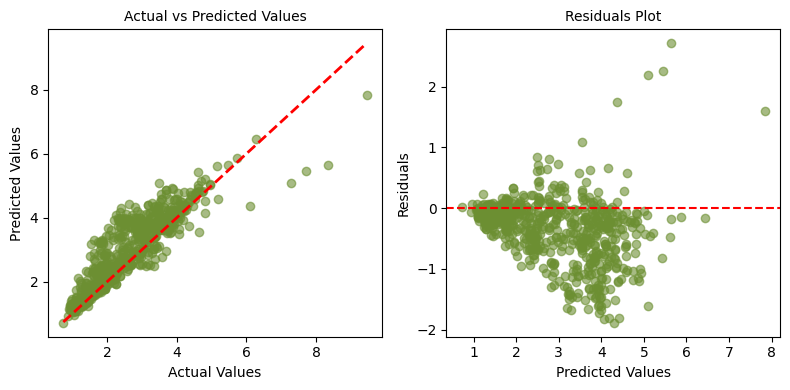

In [43]:
# Evaluate model residuals
plot_residuals(y_test, y_pred)

The results from the above plots are as follows:

The scatter plot on the left shows the actual values on the x-axis and the predicted values on the y-axis. The red dashed line represents the perfect prediction line, where the predicted values would exactly match the actual values. Most of the points are clustered close to the line, indicating that the model is performing reasonably well in predicting values close to the actual ones. However, there are a few points that deviate from the line, particularly at the higher values.

The plot on the right displays the residuals (the difference between actual and predicted values) on the y-axis, with predicted values on the x-axis. The red dashed line represents where the residuals would be zero (i.e., perfect predictions). There seems to be a concentration of residuals below zero for higher predicted values, which suggests that the model tends to underpredict when the predicted values are larger. This suggests that the model's predictions are not as accurate for high values.

Next, to identify whether whether certain regional patterns were modeled better, visualise model predictions for each region. Use the create_subplots function defined in Section 6 to construct subplots.

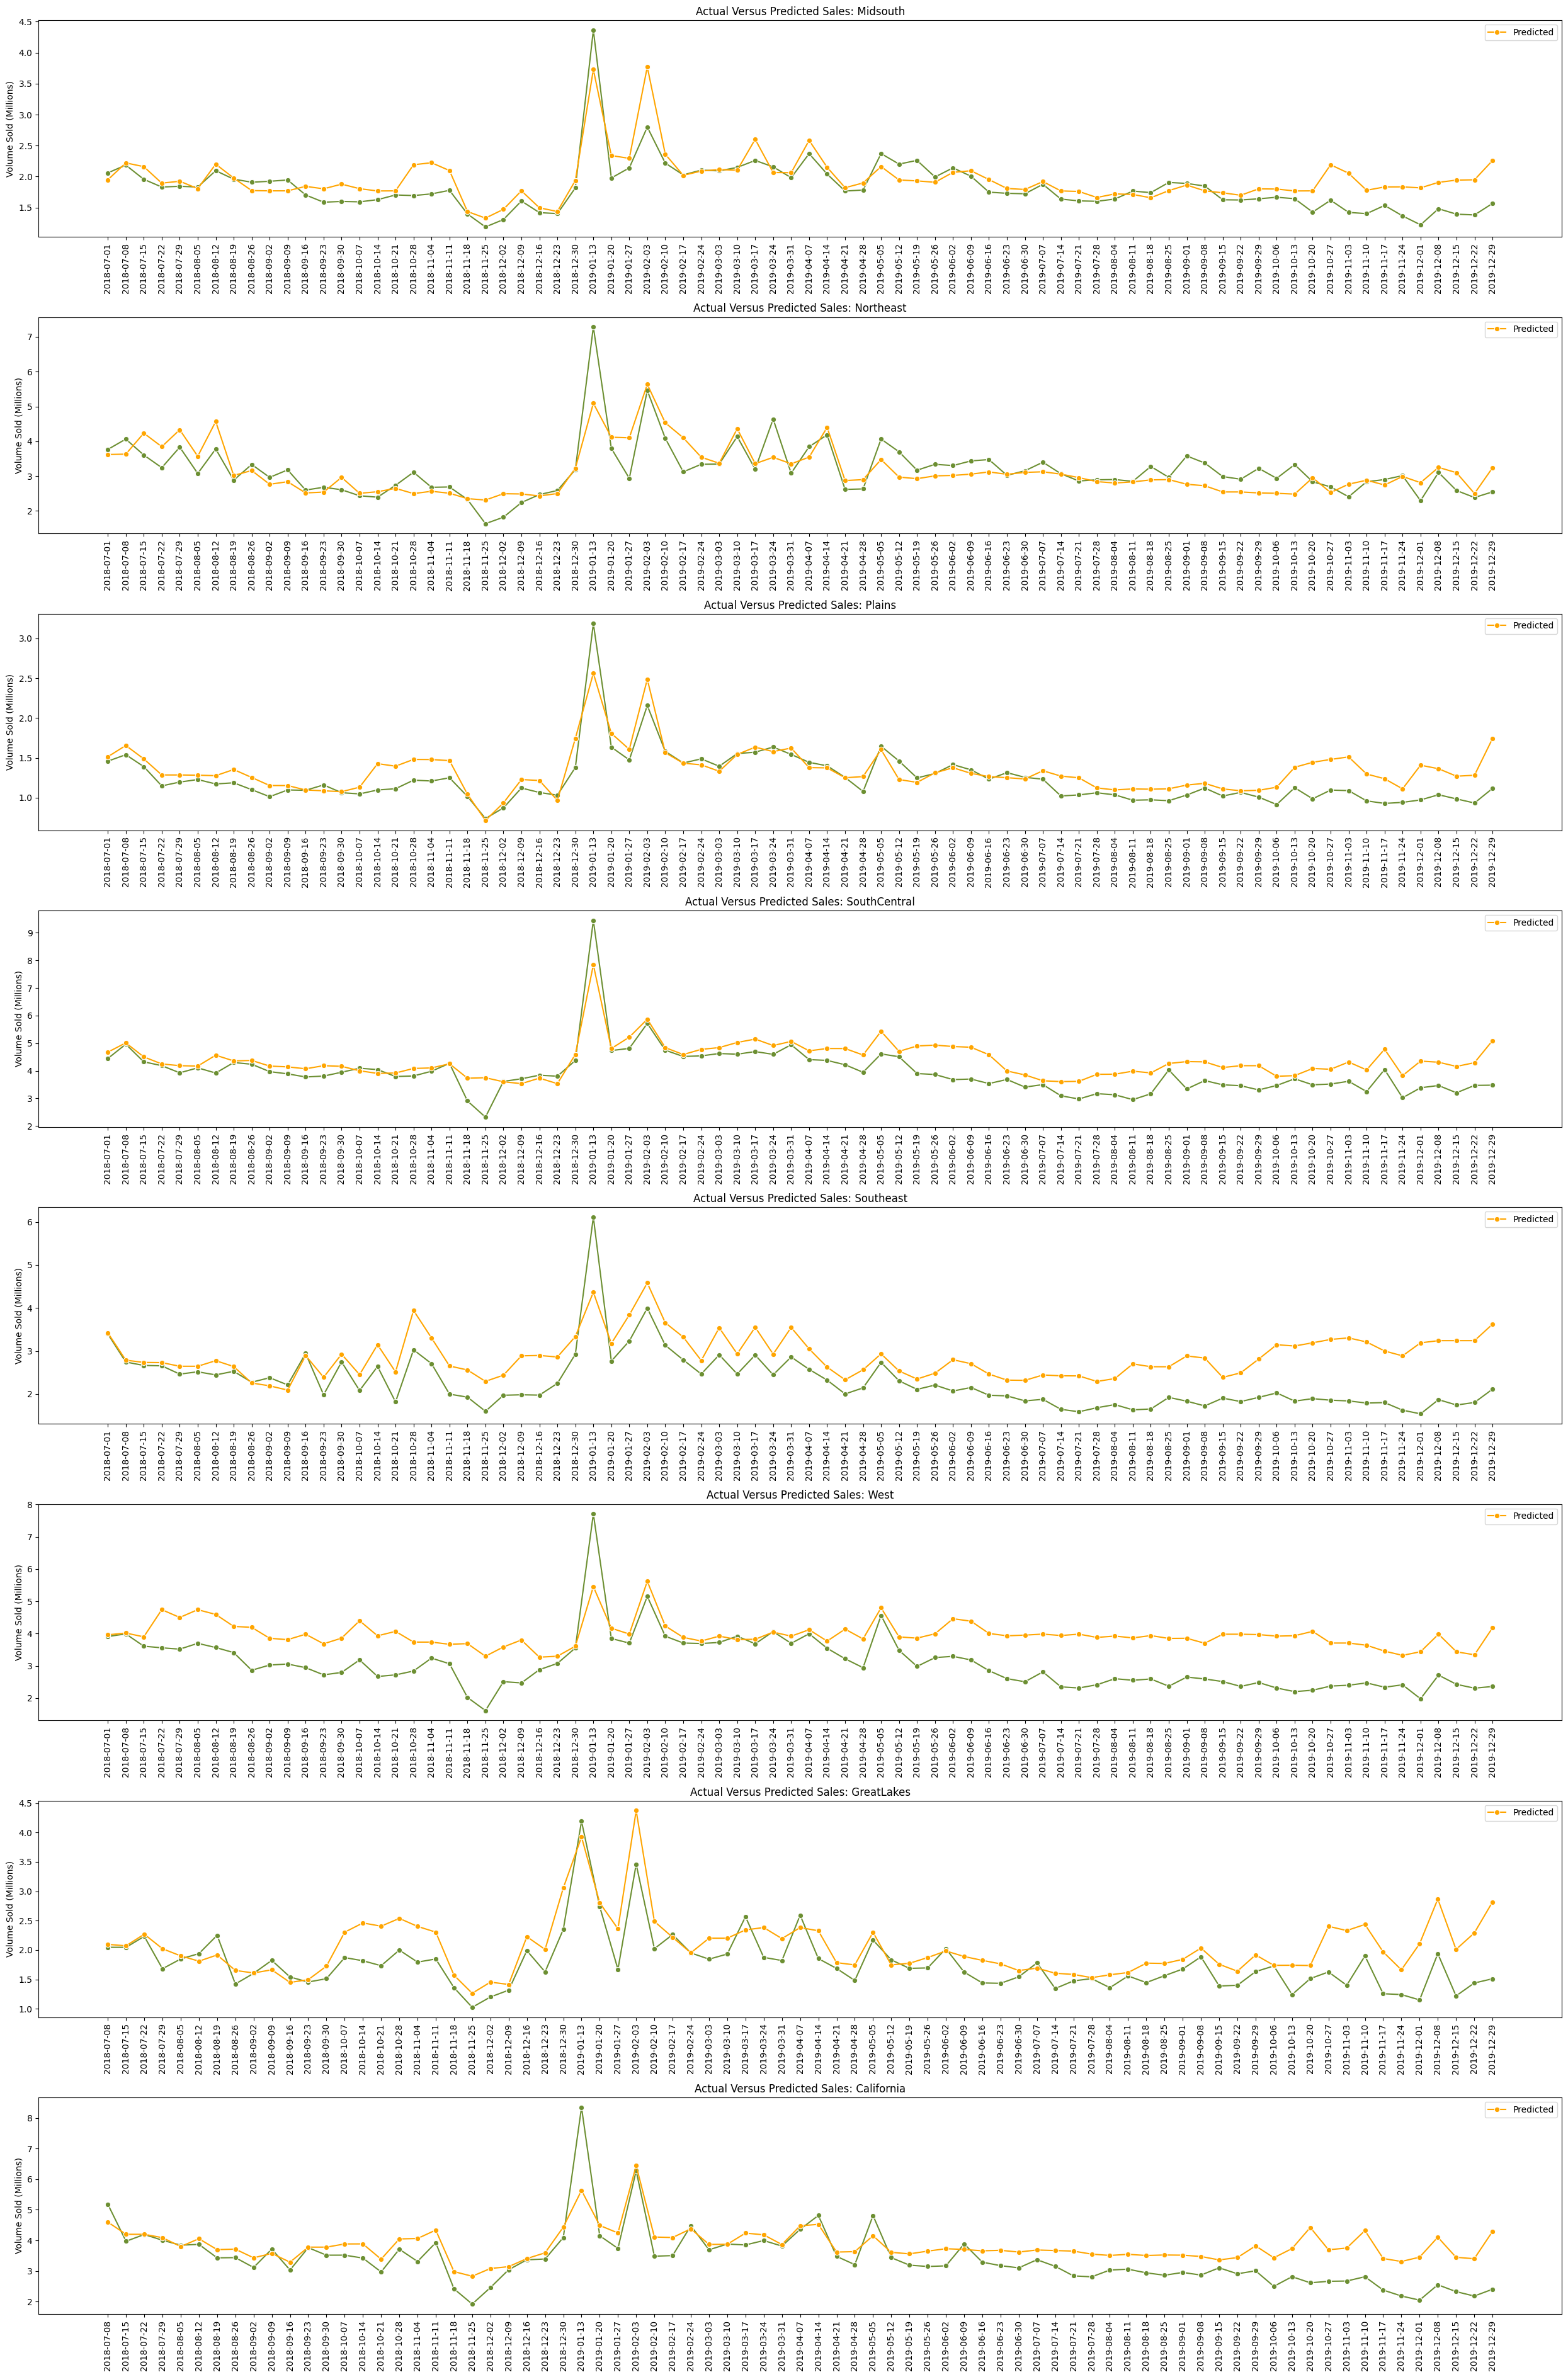

In [44]:
# Define regions of interest
regions = X_test["region"].unique().tolist()
n_regions = int(len(regions))

# Merge the feature and predictor test data 
# in preparation for filtering by region
test_data = pd.concat([X_test, y_test], axis=1)
test_and_pred_results = {}

for region in regions:

    # Filter the test data by region
    regional_data = test_data[test_data["region"] == region]
    regional_X_test = regional_data.drop(columns=["volume_sold"])
    regional_y_test = regional_data["volume_sold"]

    # Compute predicted sales
    regional_y_pred = best_model.predict(regional_X_test)

    # Save the test and prediction values to a dictionary of DataFrames,
    # where each key represents a region, and the corresponding value is
    # a DataFrame containing the test and prediction values for the region
    regional_test_and_pred = pd.concat(
        [regional_y_test, pd.DataFrame(regional_y_pred, index=regional_y_test.index)],
        axis=1,
    )
    regional_test_and_pred.columns = ["y_test", "y_pred"]
    regional_test_and_pred.reset_index(inplace=True)
    regional_test_and_pred["date"] = regional_test_and_pred["date"].astype(str)
    test_and_pred_results[region] = regional_test_and_pred


# Generate a list containing the test and prediction data for each region
data_list = list(test_and_pred_results.values())

# Plot the actual vs predicted values for each region
create_subplots(
    nrows=n_regions,
    ncols=1,
    plot_types=["lineplot"] * n_regions,
    data_list=data_list,
    figsize=(25, 40),
    x_vars=["date"] * n_regions,
    y_vars=["y_test"] * n_regions,
    ylabels=["Volume Sold (Millions)"] * n_regions,
    xrotation=90,
    palettes=["#6C8F32"] * n_regions,
    titles=[f"Actual Versus Predicted Sales: {region}" for region in regions],
    twin_lineplots=False,
    secondary_data=data_list,
    secondary_y=["y_pred"] * n_regions,
    secondary_ylabels=["Sales Volumes"] * n_regions,
    secondary_colors=["orange"] * n_regions,
    secondary_labels=["Predicted"] * n_regions,
)

The results from the above plots are as follows:

The actual sales (green lines) and predicted sales (orange lines) follow similar patterns across all regions, suggesting that the model captures the overall sales trend reasonably well. However, while the model predicts sales accurately for some regions, it overestimates or underestimates sales more significantly in others. These discrepancies are especially noticeable for 2019 sales compared to 2018, where the model shows larger deviations from the actual values.

Plot the model features with the most impact on sales predictions.

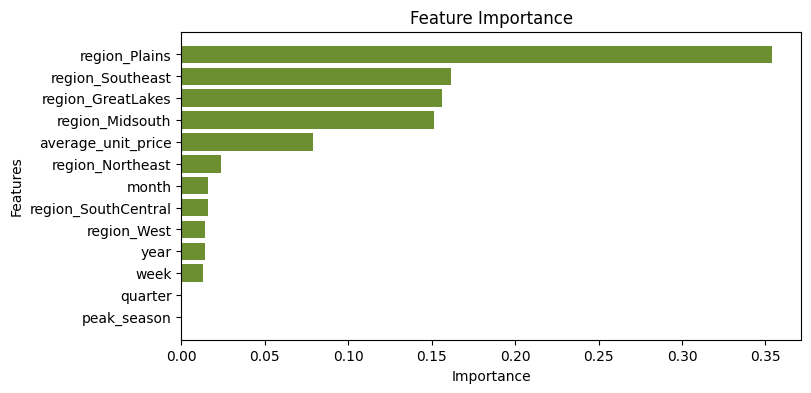

In [45]:
# Extract feature importance values and feature names
feature_importance = best_model.named_steps["model"].feature_importances_
feature_names = best_model.named_steps["transform"].get_feature_names_out()
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importance}
)

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance")

# Plot feature names and importance values
plt.figure(figsize=(8, 4))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"],
    color="#6C8F32",
)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.grid(False)
plt.show()

The most influential features in the model's predictions are specific regions, the average unit price, and certain time-series features like year, month, and week.  Interestingly, the features for quarter and peak season contributed minimally, suggesting that they did not play a significant role in improving the model’s accuracy.

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="optimisation" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">8. Optimising Price Based on Demand</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

Use the existing regression model to predict sales volume (demand) at different price points and determine the optimal pricing for conventional avocados in each region to maximise revenue. Revenue is calculated as the product of price and predicted demand.

Define the revenue objective function to be maximised.

In [46]:
def revenue(price, other_factors, upper_price_bound, penalty_weight=0):
    """
    Function to calculate revenue based on price and demand.
    Arguments:
    - price (float): Price of product.
    - other_factors (pd.DataFrame): A DataFrame of factors, other than demand, influencing the demand of a product.
    Returns:
    - revenue: revenue gained at a particular price point.
    """
    # Add price as a factor for predicting demand
    factors = other_factors.copy()
    factors["average_unit_price"] = price

    # Predict demand
    demand = best_model.predict(factors.to_frame().T)

    # Calculate revenue
    base_revenue = price * demand

    # Penalty term to penalise prices close to the maximum price (quadratic penalty)
    penalty = penalty_weight * ((price - upper_price_bound) / upper_price_bound) ** 2

    return base_revenue - penalty

Next, create a function to find the optimal price point by maximizing the objective function. If the optimal price reaches the upper boundary, apply progressively increasing penalties to adjust the result. These penalties simulate a real-world relationship between price and revenue, ensuring that when demand decreases moderately at high prices, the larger multiplicative effect of price on revenue is realistically balanced.

In [47]:
def find_optimal_price(price_points, other_factors, upper_price_bound, penalty_weight=0, penalty_step=-1):
    """
    Recursive function to calculate the optimal price with incremental penalties for prices too high.
    Arguments:
    - price_points (np.array): Prices to evaluate.
    - other_factors (pd.DataFrame): A DataFrame of factors, other than demand, influencing the demand of a product.
    - upper_price_bound (float): Upper price boundary.
    - penalty_weight (int): A penalty to keep prices below the upper price boundary.
    - penalty_step (float): Incremental amount to increase the penalty by during each iteration. 
    Returns:
    - optimal_price: The optimal price.
    - max_revenue: The maximum revenue generated at the optimal price.
    - revenues: All revenues calculated during the optimisation process.
    """
    
    # Calculate revenue for each price point
    revenues = [revenue(p, other_factors, upper_price_bound, penalty_weight) for p in price_points]

    # Find the price with the maximum revenue
    max_revenue_idx = np.argmax(revenues)
    optimal_price = price_points[max_revenue_idx]
    max_revenue = revenues[max_revenue_idx]

    # Check if the optimal price is the same as the upper price bound
    if optimal_price == upper_price_bound:

        # If it is, recursively call the function with a higher penalty
        penalty_weight += penalty_step
        return find_optimal_price(price_points, other_factors, upper_price_bound, penalty_weight, penalty_step)
    
    else:
        # Return the optimal price and maximum revenue
        return optimal_price, max_revenue, revenues

Prepare a sample dataset for optimising price based on predicted demand.

In [48]:
# Get the maximum average unit price for each region from avo_data
price_bounds = avo_data.groupby("region")["average_unit_price"].agg(
    upper_price_bound="max",
    lower_price_bound="min"
).reset_index()

# Extract a test subset of data for each region and
# merge it with the maximum and minimum price details
regional_data = X_test.drop(columns=["average_unit_price"]).tail(8)
regional_data = regional_data.merge(price_bounds, on="region", how="left")

# View the data
regional_data

,year,region,peak_season,month,quarter,week,upper_price_bound,lower_price_bound
0,2019,SouthCentral,0,12,4,52,1.366446,0.62
1,2019,Plains,0,12,4,52,1.810000,0.76
2,2019,Northeast,0,12,4,52,1.750000,0.87
3,2019,Southeast,0,12,4,52,1.820000,0.62
4,2019,GreatLakes,0,12,4,52,1.980000,0.73
5,2019,California,0,12,4,52,1.850313,0.67
6,2019,Midsouth,0,12,4,52,1.720000,0.91
7,2019,West,0,12,4,52,1.648013,0.66


Utilise the previously defined `find_optimal_price` function to obtain the optimal price for each region in the regional_data dataset. Additionally, create a plot of price versus revenue for each region, emphasising the optimal price point.

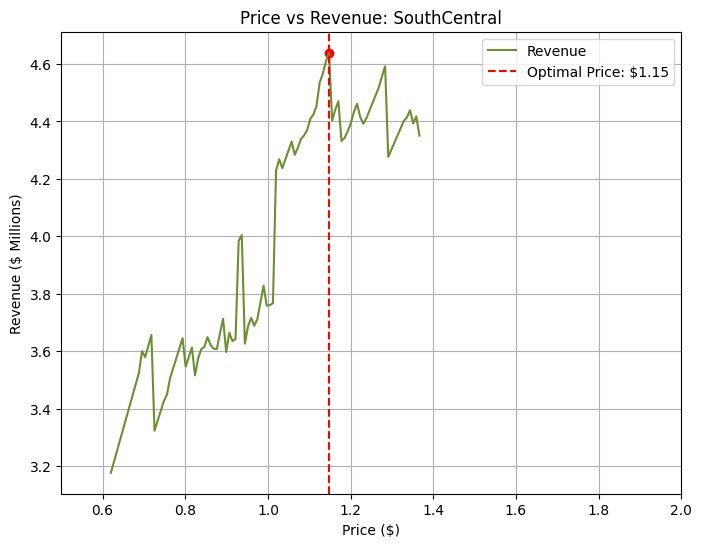

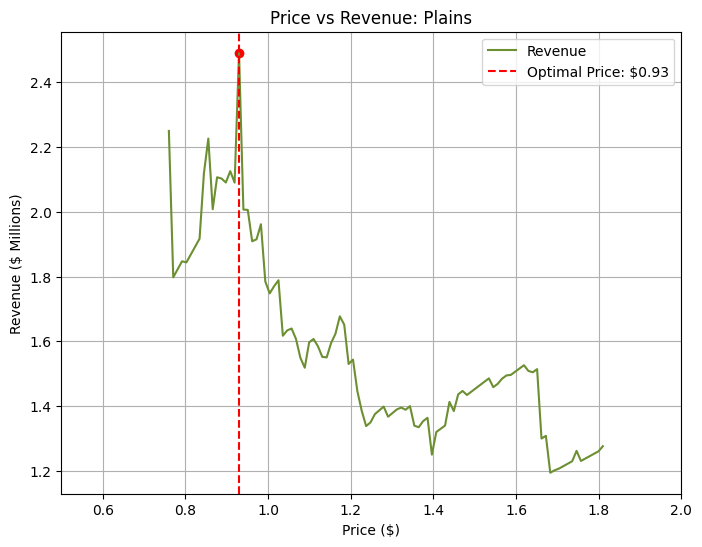

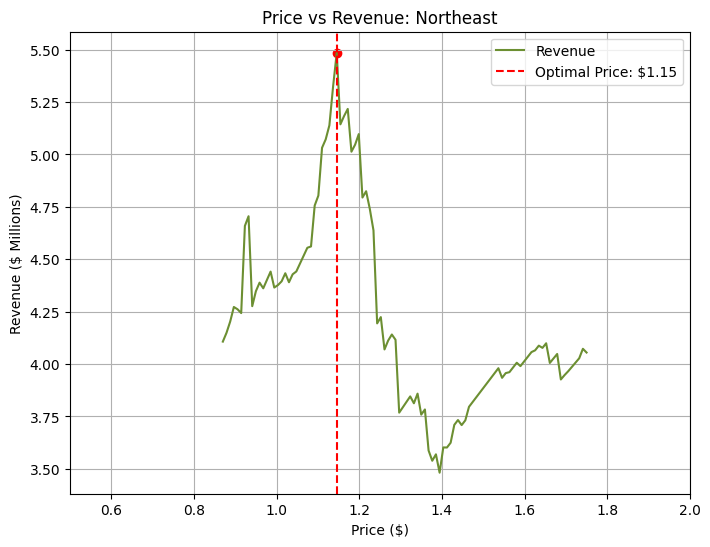

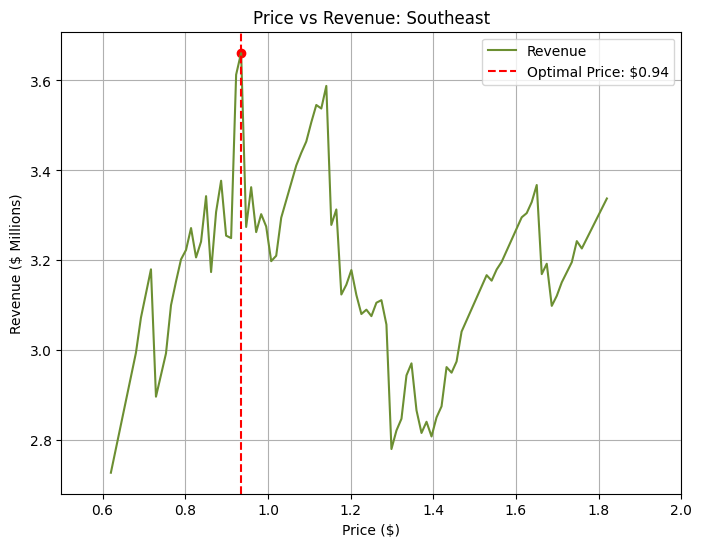

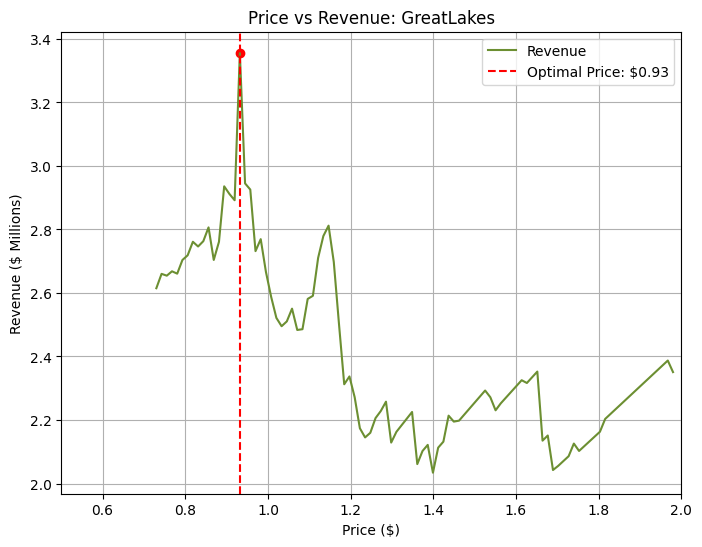

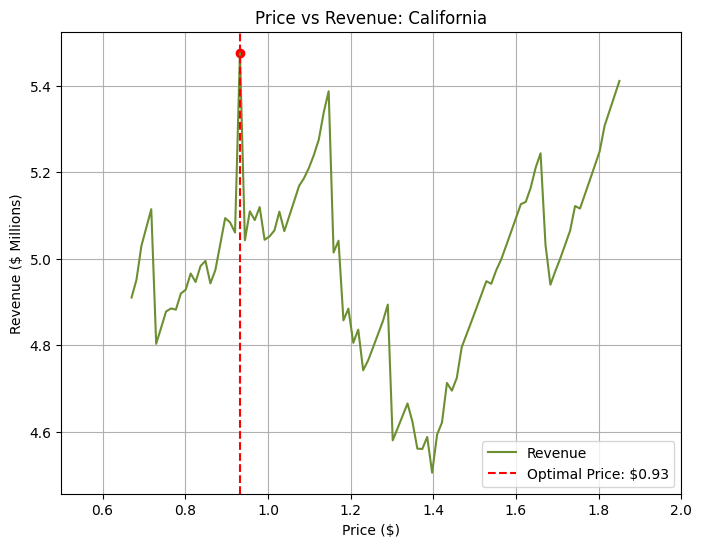

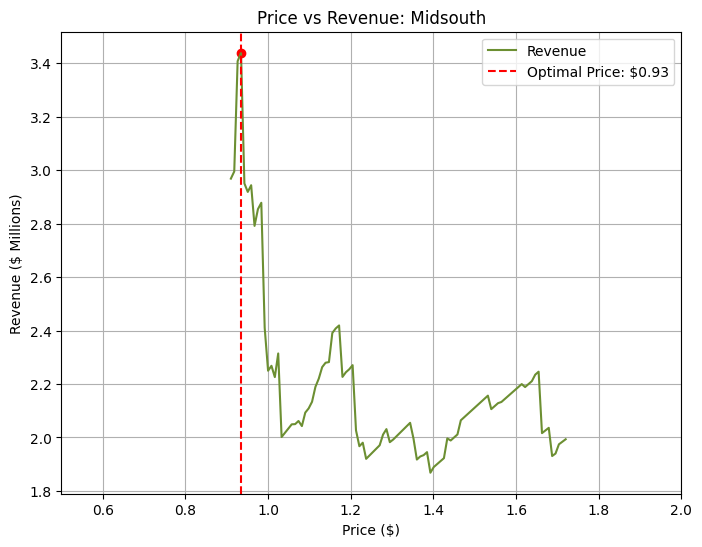

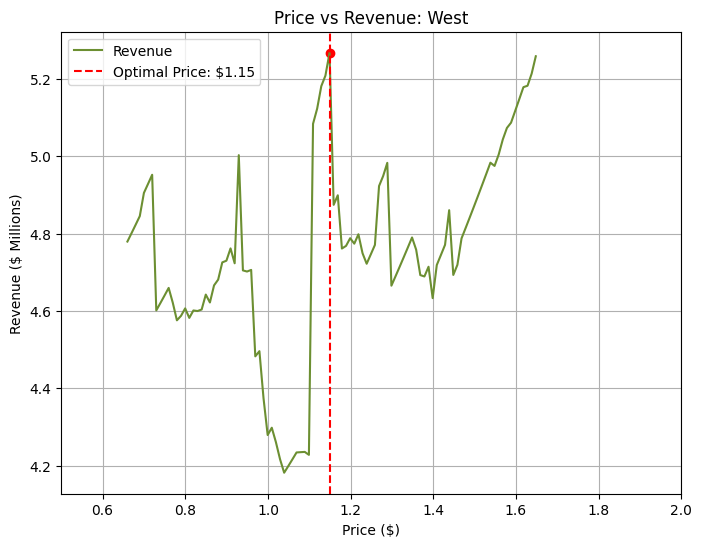

In [49]:
# Initialise a list to store optimal prices and revenues for each row in the data
optimal_prices = []
max_revenues = []

# Define the number of price points to check
num_price_points = 100

# Iterate through each row in the data
for i, row in regional_data.iterrows():

    # Specify factors other than pricing for predicting demand
    other_factors = row.drop(columns=["upper_price_bound", "lower_price_bound"])

    # Specify upper and lower pricing bounds
    upper_price_bound = row["upper_price_bound"]
    lower_price_bound = row["lower_price_bound"]

    # Generate a range of price points between the lower and upper bounds
    price_points = np.linspace(lower_price_bound, upper_price_bound, num=num_price_points)

    # Find the optimal price using the recursive function
    optimal_price, max_revenue, revenues = find_optimal_price(price_points, other_factors, upper_price_bound)

    # Store the results
    optimal_prices.append(optimal_price)
    max_revenues.append(max_revenue)

    # Plot price vs revenue for the current region
    plt.figure(figsize=(8, 6))
    plt.plot(price_points, revenues, label="Revenue", color="#6C8F32")
    plt.axvline(optimal_price, color='r', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
    plt.scatter([optimal_price], [max_revenue], color='red')  # Mark the optimal price
    plt.title(f'Price vs Revenue: {row["region"]}')
    plt.xlabel('Price ($)')
    plt.ylabel('Revenue ($ Millions)')
    plt.xlim(0.5, 2.0)
    plt.legend()
    plt.grid(True)
    plt.show()

The plots above show the predicted revenue across various price points for each region during the 52nd week of 2019, represented by a green line. The revenue curves exhibit fluctuations rather than a smooth progression, likely reflecting the influence of external factors such as seasonality, competition, and consumer preferences on demand. Each plot highlights the optimal price with a red dotted line. Notably, three of the regions have an optimal price of 1.15 Dollars, while the optimal price for the other regions is around 0.93-0.94 Dollars. This similarity may stem from a consistent impact of pricing and external factors on avocado demand across all regions, or it could indicate an overgeneralisation of the model that fails to capture the unique characteristics of each region.

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="conclusion" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">9. Conclusion</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

The goal of this project was to: (i) predict avocado sales volumes (demand) based on price, seasonality and region, and (ii) to use the predicted demand to identify optimal avocado prices that would maximise revenue for specific regions at various times of the year. 

To forecast avocado sales volumes, multiple regression models were evaluated using cross-validation. The XGB model performed best, achieving a MAPE of just under 20% on an unseen test set of 622 observations. While the model captured the overall sales trends well; it struggled to accurately predict larger, potentially outlier, sales volumes. 

Following model construction, the model was integrated into a price optimisation process, where demand predictions across different price points were used to select the price that maximised revenue, calculated as the product of price and demand. The optimal prices predicted for the various regions were similar, indicating that the impact of pricing and external factors on pricing may be consistent across regions, or alternatively, a failure of the model to generalise to the unique characteristics of each region.

Future work for this project could include developing a new model to predict avocado demand for more recent years, as the current model was trained and tested on data prior to 2020. Additionally, future work could focus on refining the current model's ability to predict peak sales periods by incorporating new features or experimenting with alternative model types.

<hr style="border: none; border-top: 1px solid black; height: 1px;">
<h2 id="references" style="color: white; background-color: #356211; margin: 10px; padding: 15px; padding-left: 15px; border-radius: 4px;">10. References</h2>
<hr style="border: none; border-top: 1px solid black; height: 1px;">

The data used in this project was sourced from Kaggle and can be accessed [here](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/data). The data was originally obtained from the [Hass Avocado Board](https://hassavocadoboard.com/).

The following articles and notebooks assisted with the approach and techniques used in this project:

- [Mastering the Art of Pricing Optimization — A Data Science Solution](https://towardsdatascience.com/mastering-the-art-of-pricing-optimization-a-data-science-solution-eb8befb79425), Towards Data Science, Rhydham Gupta
- [Price Optimization — Gurobi Machine Learning Manual](https://gurobi-machinelearning.readthedocs.io/en/latest/auto_examples/example4_price_optimization.html), Gurubi Optimization
- [Pricing Optimization with ML](https://3liud.medium.com/week-8-in-machine-learning-d39c6742a93a), Medium, Eliud Nduati
- [Avocado Demand Forecast: Boost Sales & Profit](https://www.kaggle.com/code/harits/avocado-demand-forecast-boost-sales-profit), Kaggle, Harits Fadlilah